In [1]:
#Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import six
import sys
sys.modules['sklearn.externals.six'] = six
import warnings
warnings.filterwarnings(action="ignore",category=FutureWarning)

In [2]:
pd.options.display.float_format="{:,.3f}".format

In [3]:
df=pd.read_excel("Interest_Rate.xlsx")
df.head()

,Unnamed: 0,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,0,10000001,7000,< 1 year,Rent,"68,000.000",not verified,car,18.370,0,NaN,9,14,Female,1
1,1,10000002,30000,4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.930,0,17.000,12,24,Female,3
2,2,10000003,24725,7 years,Mortgage,"75,566.400",VERIFIED - income source,debt_consolidation,15.880,0,NaN,12,16,Male,3
3,3,10000004,16000,< 1 year,NaN,"56,160.000",VERIFIED - income source,debt_consolidation,14.340,3,NaN,16,22,Male,3
4,4,10000005,17000,8 years,Own,"96,000.000",VERIFIED - income source,debt_consolidation,22.170,1,NaN,19,30,Female,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               164309 non-null  int64  
 1   Loan_ID                  164309 non-null  int64  
 2   Loan_Amount_Requested    164309 non-null  int64  
 3   Length_Employed          156938 non-null  object 
 4   Home_Owner               138960 non-null  object 
 5   Annual_Income            139207 non-null  float64
 6   Income_Verified          164309 non-null  object 
 7   Purpose_Of_Loan          164309 non-null  object 
 8   Debt_To_Income           164309 non-null  float64
 9   Inquiries_Last_6Mo       164309 non-null  int64  
 10  Months_Since_Deliquency  75930 non-null   float64
 11  Number_Open_Accounts     164309 non-null  int64  
 12  Total_Accounts           164309 non-null  int64  
 13  Gender                   164309 non-null  object 
 14  Inte

In [5]:
df=df.drop(columns=["Unnamed: 0","Loan_ID"])
df.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,7000,< 1 year,Rent,"68,000.000",not verified,car,18.370,0,NaN,9,14,Female,1
1,30000,4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.930,0,17.000,12,24,Female,3
2,24725,7 years,Mortgage,"75,566.400",VERIFIED - income source,debt_consolidation,15.880,0,NaN,12,16,Male,3
3,16000,< 1 year,NaN,"56,160.000",VERIFIED - income source,debt_consolidation,14.340,3,NaN,16,22,Male,3
4,17000,8 years,Own,"96,000.000",VERIFIED - income source,debt_consolidation,22.170,1,NaN,19,30,Female,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_Amount_Requested    164309 non-null  int64  
 1   Length_Employed          156938 non-null  object 
 2   Home_Owner               138960 non-null  object 
 3   Annual_Income            139207 non-null  float64
 4   Income_Verified          164309 non-null  object 
 5   Purpose_Of_Loan          164309 non-null  object 
 6   Debt_To_Income           164309 non-null  float64
 7   Inquiries_Last_6Mo       164309 non-null  int64  
 8   Months_Since_Deliquency  75930 non-null   float64
 9   Number_Open_Accounts     164309 non-null  int64  
 10  Total_Accounts           164309 non-null  int64  
 11  Gender                   164309 non-null  object 
 12  Interest_Rate            164309 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 16.3+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Loan_Amount_Requested,"164,309.000","14,349.337","8,281.869",500.000,"8,000.000","12,075.000","20,000.000","35,000.000"
Annual_Income,"139,207.000","73,331.159","60,377.498","4,000.000","45,000.000","63,000.000","88,697.500","7,500,000.000"
Debt_To_Income,"164,309.000",17.207,7.845,0.000,11.370,16.840,22.780,39.990
Inquiries_Last_6Mo,"164,309.000",0.782,1.035,0.000,0.000,0.000,1.000,8.000
Months_Since_Deliquency,"75,930.000",34.229,21.761,0.000,16.000,31.000,50.000,180.000
Number_Open_Accounts,"164,309.000",11.194,4.992,0.000,8.000,10.000,14.000,76.000
Total_Accounts,"164,309.000",25.068,11.583,2.000,17.000,23.000,32.000,156.000
Interest_Rate,"164,309.000",2.159,0.738,1.000,2.000,2.000,3.000,3.000


In [8]:
#Finding if there is null values
(df.isnull().sum()/df.shape[0])*100

Loan_Amount_Requested      0.000
Length_Employed            4.486
Home_Owner                15.428
Annual_Income             15.277
Income_Verified            0.000
Purpose_Of_Loan            0.000
Debt_To_Income             0.000
Inquiries_Last_6Mo         0.000
Months_Since_Deliquency   53.788
Number_Open_Accounts       0.000
Total_Accounts             0.000
Gender                     0.000
Interest_Rate              0.000
dtype: float64

In [9]:
#Dropping Months_Since_Deliquency because it has a huge percentage of null values
df=df.drop(columns=["Months_Since_Deliquency"])

In [10]:
#Finding is there is null values
(df.isnull().sum()/df.shape[0])*100

Loan_Amount_Requested    0.000
Length_Employed          4.486
Home_Owner              15.428
Annual_Income           15.277
Income_Verified          0.000
Purpose_Of_Loan          0.000
Debt_To_Income           0.000
Inquiries_Last_6Mo       0.000
Number_Open_Accounts     0.000
Total_Accounts           0.000
Gender                   0.000
Interest_Rate            0.000
dtype: float64

In [11]:
#Analyzing the columns with the null values
df[["Length_Employed","Home_Owner","Annual_Income"]]

,Length_Employed,Home_Owner,Annual_Income
0,< 1 year,Rent,"68,000.000"
1,4 years,Mortgage,NaN
2,7 years,Mortgage,"75,566.400"
3,< 1 year,NaN,"56,160.000"
4,8 years,Own,"96,000.000"
...,...,...,...
164304,10+ years,Rent,NaN
164305,8 years,Own,NaN
164306,10+ years,Mortgage,NaN
164307,4 years,Rent,NaN


In [12]:
df[["Length_Employed","Home_Owner","Annual_Income"]].dtypes

Length_Employed     object
Home_Owner          object
Annual_Income      float64
dtype: object

In [13]:
#Analyzing "Length_Employed" column

df["Length_Employed"].unique()

array(['< 1 year', '4 years', '7 years', '8 years', '2 years',
       '10+ years', '1 year', nan, '6 years', '9 years', '3 years',
       '5 years'], dtype=object)

In [14]:
#Filling the nan values in the feature "Length_Employed" with the most frequent value

df["Length_Employed"]=df["Length_Employed"].fillna(df["Length_Employed"].mode()[0])

In [15]:
#Analyzing "Home_Owner" column

df["Home_Owner"].unique()

array(['Rent', 'Mortgage', nan, 'Own', 'Other', 'None'], dtype=object)

In [16]:
#Filling the nan values in the feature "Home_Owner" with the most frequent value

df["Home_Owner"]=df["Home_Owner"].fillna(df["Home_Owner"].mode()[0])

In [17]:
#Filling "Annual_Income" column with the mean
df["Annual_Income"]=df["Annual_Income"].fillna(df["Annual_Income"].mean())

In [18]:
#Finding is there is still null values
(df.isnull().sum()/df.shape[0])*100

Loan_Amount_Requested   0.000
Length_Employed         0.000
Home_Owner              0.000
Annual_Income           0.000
Income_Verified         0.000
Purpose_Of_Loan         0.000
Debt_To_Income          0.000
Inquiries_Last_6Mo      0.000
Number_Open_Accounts    0.000
Total_Accounts          0.000
Gender                  0.000
Interest_Rate           0.000
dtype: float64

In [19]:
#Finding the categorical features and the amount of different values they have

categorical=df.select_dtypes(include="object").columns

for line in categorical:
    print("The feature " + line + " contains" ,  str(len(df[line].unique())) ," distinct values ")
    

The feature Length_Employed contains 11  distinct values 
The feature Home_Owner contains 5  distinct values 
The feature Income_Verified contains 3  distinct values 
The feature Purpose_Of_Loan contains 14  distinct values 
The feature Gender contains 2  distinct values 


In [20]:
df[categorical].head()

,Length_Employed,Home_Owner,Income_Verified,Purpose_Of_Loan,Gender
0,< 1 year,Rent,not verified,car,Female
1,4 years,Mortgage,VERIFIED - income,debt_consolidation,Female
2,7 years,Mortgage,VERIFIED - income source,debt_consolidation,Male
3,< 1 year,Mortgage,VERIFIED - income source,debt_consolidation,Male
4,8 years,Own,VERIFIED - income source,debt_consolidation,Female


In [21]:
#Creating new features with the help of get_dummies
new_features=pd.get_dummies(df[categorical])

#Joining the new features with the first dataframe
df=pd.concat([df,new_features],axis=1)

#Dropping the categorical columns due to they were transformed in new columns
df=df.drop(columns=categorical)
df.head()

,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Interest_Rate,Length_Employed_1 year,Length_Employed_10+ years,Length_Employed_2 years,...,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_Female,Gender_Male
0,7000,"68,000.000",18.370,0,9,14,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,30000,"73,331.159",14.930,0,12,24,3,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,24725,"75,566.400",15.880,0,12,16,3,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,16000,"56,160.000",14.340,3,16,22,3,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,17000,"96,000.000",22.170,1,19,30,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
df.shape

(164309, 42)

In [23]:
#Defining X and y
X=df.drop(columns=["Interest_Rate"])
y=df[["Interest_Rate"]]

In [24]:
#Finding the percentage of each class
(y.value_counts()/y.shape[0])*100

Interest_Rate
2               42.956
3               36.470
1               20.575
dtype: float64

In [25]:
#Balancing the classes with imblearn
from imblearn.over_sampling import SMOTE

# Estrategy of undersampling
resample = SMOTE(k_neighbors=3)

# Fit and apply the transformation
X_bal, y_bal = resample.fit_resample(X, y)

# Results
(y_bal.value_counts()/y_bal.shape[0])*100


Interest_Rate
1               33.333
2               33.333
3               33.333
dtype: float64

In [26]:
new_data=pd.concat([X_bal,y_bal],axis=1)
new_data.to_csv("new_data_generated.csv",index=False)

In [3]:
#Open the data data
new_df=pd.read_csv("new_data_generated.csv")
#Changing the number of the target to get numbers from 0 to 2 ( 0,1,2) in order to avoid problems with some algorithms
new_df[["Interest_Rate"]]=new_df[["Interest_Rate"]]-1
new_df.head()

,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Length_Employed_1 year,Length_Employed_10+ years,Length_Employed_2 years,Length_Employed_3 years,...,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_Female,Gender_Male,Interest_Rate
0,7000,"68,000.000",18.370,0,9,14,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,30000,"73,331.159",14.930,0,12,24,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
2,24725,"75,566.400",15.880,0,12,16,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
3,16000,"56,160.000",14.340,3,16,22,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
4,17000,"96,000.000",22.170,1,19,30,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
#Defining X and y
X_bal=new_df.drop(columns=["Interest_Rate"])
y_bal=new_df[["Interest_Rate"]]

In [5]:
#Splitting the data in train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_bal,y_bal,test_size=0.3, stratify=y_bal,random_state=42)

In [6]:
#Standardization the data

from sklearn.preprocessing import StandardScaler

scaler_x=StandardScaler()

scaler_x.fit(X_train)

X_train=pd.DataFrame(scaler_x.transform(X_train),columns=X_train.columns)

X_test=pd.DataFrame(scaler_x.transform(X_test),columns=X_test.columns)

In [7]:
#EVALUATING DIFFERENT MACHINE LEARNING MODELS

In [8]:
#EVALUATING DIFFERENT MACHINE LEARNING MODELS

#Importing the libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#Ensemble
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier,VotingClassifier

#Estimators for voting
estimators_voting=[("lr",LogisticRegression(solver="lbfgs",max_iter=10000,multi_class="multinomial")),("knn",KNeighborsClassifier(5)),("rfc",RandomForestClassifier())]

#Estimators for stacking
# Prepare the list of tuples with the first-layer classifiers
classifiers = [('clf_dt',DecisionTreeClassifier(min_samples_leaf= 3 , min_samples_split= 9, random_state=500)),('clf_knn',KNeighborsClassifier(n_neighbors=5,algorithm= 'ball_tree'))]
# Instantiate the second-layer meta estimator
clf_meta = RandomForestClassifier(n_estimators=10,random_state=69)

In [9]:
#Preparing the models
models=[]
models.append(("Logistic Regression",LogisticRegression(solver="lbfgs",max_iter=10000,multi_class="multinomial")))
models.append(("LDA",LinearDiscriminantAnalysis()))
models.append(("Naive Bayes",GaussianNB()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("XGB Classifier",XGBClassifier(objective="multi:softmax")))
models.append(("Cat Boost Classifier",CatBoostClassifier(n_estimators =100,learning_rate=0.1, max_depth=3, random_state=500,verbose=0)))
models.append(("LGBM Classifier",LGBMClassifier(max_depth = 3, learning_rate = 0.1, n_estimators = 10, objective='multiclass', seed=500,verbose=0,force_row_wise=True)))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("Bagging Class",BaggingClassifier()))
models.append(("Extra trees",ExtraTreesClassifier()))
models.append(("Ada Boost",AdaBoostClassifier()))
models.append(("Gradient Boosting",GradientBoostingClassifier()))
models.append(("Voting Classifier",VotingClassifier(estimators_voting)))
models.append(("Average Voting Classifier",VotingClassifier(estimators_voting,voting="soft")))
models.append(("Stacking Classifier",StackingClassifier(classifiers,clf_meta,stack_method='predict_proba',passthrough = False)))

#Evaluating each model in turn
results=[]
names=[]
scoring="accuracy"
scaler=StandardScaler()

for name, model in models:
  kfold=KFold(n_splits=10,shuffle=True)
  cv_results=cross_val_score(model,X_train.values,y_train.values.reshape(-1,1).ravel(),cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(f"{name} :{cv_results.mean()*100:,.2f}% ({cv_results.std()*100:.2f}%)")

Logistic Regression :57.98% (0.48%)
LDA :57.46% (0.36%)
Naive Bayes :45.56% (2.66%)
KNN :51.99% (0.43%)
Decision Tree :49.64% (0.42%)
XGB Classifier :59.51% (0.45%)
Cat Boost Classifier :57.33% (0.31%)
LGBM Classifier :54.49% (0.28%)
Random Forest :57.13% (0.43%)
Bagging Class :54.32% (0.48%)
Extra trees :55.59% (0.28%)
Ada Boost :56.32% (0.37%)
Gradient Boosting :58.18% (0.46%)
Voting Classifier :56.91% (0.43%)
Average Voting Classifier :56.99% (0.37%)
Stacking Classifier :54.25% (0.29%)


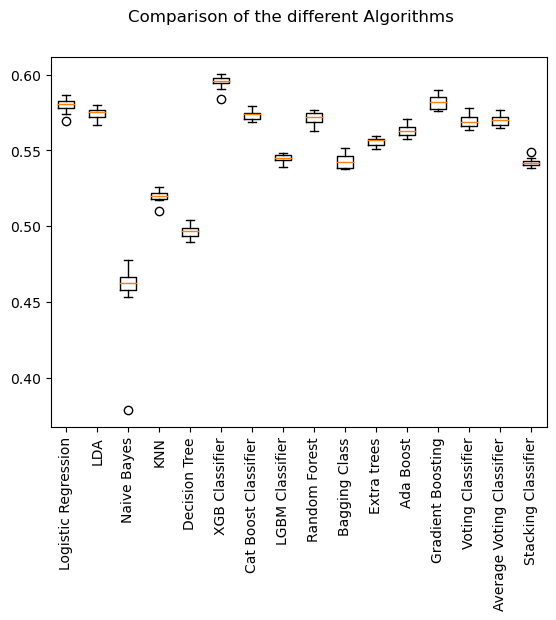

In [10]:
import matplotlib.pyplot as plt
fig=plt.figure()
fig.suptitle("Comparison of the different Algorithms")
ax=fig.add_subplot(111)
plt.rcParams["figure.figsize"]=[4,6]
plt.boxplot(results)
ax.set_xticklabels(names,rotation="vertical")
plt.show()

In [34]:
#Fine Tuning the best model

from sklearn.model_selection import GridSearchCV
import numpy as np


parameters = {
    'n_estimators': range(5,20),
    'max_depth': range(2, 12)
}

model=XGBClassifier(objective="multi:softmax")

kfold=KFold(n_splits=5,shuffle=True)

grid_result=GridSearchCV(estimator=model,param_grid=parameters,cv=kfold)

grid_result.fit(X_train.values,(y_train.values.reshape(-1,1)).ravel())

#Summarize_results

print("Best : %f using the params %s" % (grid_result.best_score_ , grid_result.best_params_))

means=grid_result.cv_results_["mean_test_score"]
stds=grid_result.cv_results_["std_test_score"]
params=grid_result.cv_results_["params"]


for mean,stdev,param in zip(means,stds,params):
    
  print("%f (%f) with %r" % (mean,stdev,param))

Best : 0.587243 using the params {'max_depth': 9, 'n_estimators': 19}
0.521064 (0.005056) with {'max_depth': 2, 'n_estimators': 5}
0.528795 (0.002991) with {'max_depth': 2, 'n_estimators': 6}
0.531359 (0.004616) with {'max_depth': 2, 'n_estimators': 7}
0.536676 (0.004922) with {'max_depth': 2, 'n_estimators': 8}
0.538275 (0.004417) with {'max_depth': 2, 'n_estimators': 9}
0.539206 (0.003394) with {'max_depth': 2, 'n_estimators': 10}
0.542950 (0.003264) with {'max_depth': 2, 'n_estimators': 11}
0.546472 (0.003782) with {'max_depth': 2, 'n_estimators': 12}
0.549582 (0.002189) with {'max_depth': 2, 'n_estimators': 13}
0.549994 (0.001777) with {'max_depth': 2, 'n_estimators': 14}
0.552659 (0.001301) with {'max_depth': 2, 'n_estimators': 15}
0.555310 (0.001583) with {'max_depth': 2, 'n_estimators': 16}
0.556181 (0.001939) with {'max_depth': 2, 'n_estimators': 17}
0.557867 (0.001369) with {'max_depth': 2, 'n_estimators': 18}
0.559176 (0.000979) with {'max_depth': 2, 'n_estimators': 19}
0.544

In [35]:
#Saving the scalers
from pickle import dump
dump(scaler_x,open("scaler_x.pkl","wb"))

In [36]:
#Saving the fine_tuned model
dump(grid_result,open("best_model_multiclass.pkl","wb"))

In [37]:
#Evaluating the model using cohen_kappa and classification_report

from sklearn.metrics import cohen_kappa_score,classification_report

y_pred=pd.DataFrame(grid_result.predict(X_test).reshape(-1,1),columns=y_test.columns)

kappa=cohen_kappa_score(y_test,y_pred)

clas_rep=classification_report(y_test,y_pred)

print("Cohen Kappa : %f  " % (kappa))
print("="*80)
print("Classification Report:")
print(clas_rep)

Cohen Kappa : 0.382710  
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.59      0.66     21174
           1       0.50      0.60      0.54     21174
           2       0.58      0.57      0.57     21174

    accuracy                           0.59     63522
   macro avg       0.60      0.59      0.59     63522
weighted avg       0.60      0.59      0.59     63522



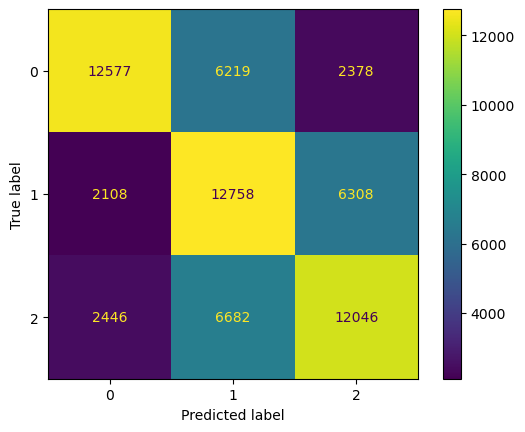

In [42]:
#Evaluating the model with a confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(grid_result,X_test.values,y_test.values.reshape(-1,1).ravel());

In [43]:
#Proving the results

for i in range(0,20):
    
    print("Real = {} , Prediction = {} ".format(y_test.values[i][0] , round(y_pred.values[i][0])) )

Real = 0 , Prediction = 0 
Real = 0 , Prediction = 2 
Real = 1 , Prediction = 1 
Real = 0 , Prediction = 2 
Real = 0 , Prediction = 2 
Real = 1 , Prediction = 2 
Real = 2 , Prediction = 1 
Real = 0 , Prediction = 1 
Real = 1 , Prediction = 1 
Real = 1 , Prediction = 2 
Real = 2 , Prediction = 2 
Real = 0 , Prediction = 0 
Real = 1 , Prediction = 2 
Real = 0 , Prediction = 0 
Real = 0 , Prediction = 0 
Real = 1 , Prediction = 1 
Real = 2 , Prediction = 2 
Real = 2 , Prediction = 2 
Real = 1 , Prediction = 2 
Real = 1 , Prediction = 0 


In [44]:
#Saving the columns in a dictionary in order to use them in production

dictionary=dict(zip(X_bal.columns,range(X_bal.shape[1])))

dump(dictionary,open("dictionary.pkl","wb"))

In [45]:
##HYPERPARAMETER TUNING WITH HYPEROPT

from hyperopt import hp,fmin,tpe
import numpy as np

# Set up space dictionary with specified hyperparameters
space = {'n_estimators':hp.quniform('n_estimators', 5,21,1),'max_depth': hp.quniform('max_depth', 2,12,2)}

# Set up objective function
def objective(params):
    params = {'n_estimators': int(params['n_estimators']),'max_depth': int(params['max_depth'])}
    xgb_clf = XGBClassifier(**params) 
    best_score = cross_val_score(xgb_clf, X_train.values, y_train, scoring='accuracy', cv=2, n_jobs=4).mean()
    loss = 1 - best_score
    return loss

# Run the algorithm
best = fmin(fn=objective,space=space, max_evals=20, rstate=np.random.default_rng(42), algo=tpe.suggest)
print(best)

100%|███████████████████████████████████████████████| 20/20 [02:00<00:00,  6.01s/trial, best loss: 0.41655534415523077]
{'max_depth': 8.0, 'n_estimators': 18.0}


In [47]:
#Creating the model with the results gotten from the Hyperopt and evaluating it using different scalers

modelo=XGBClassifier(max_depth=8, n_estimators= 18)

modelo.fit(X_train.values,y_train.values.ravel())

from sklearn.metrics import classification_report

y_pred=pd.DataFrame(grid_result.predict(X_test).reshape(-1,1),columns=y_test.columns)

clas_rep=classification_report(y_test,y_pred)

print("Classification Report:")

print(clas_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.59      0.66     21174
           1       0.50      0.60      0.54     21174
           2       0.58      0.57      0.57     21174

    accuracy                           0.59     63522
   macro avg       0.60      0.59      0.59     63522
weighted avg       0.60      0.59      0.59     63522



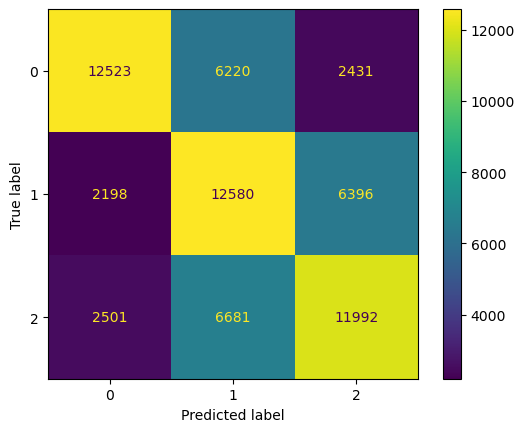

In [48]:
#Evaluating the model with a confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(modelo,X_test.values,y_test.values.reshape(-1,1).ravel());

In [55]:
#SOLVING THE PROBLEM WITH GENETIC ALGORITHMS
from tpot import TPOTClassifier
# Assign the values outlined to the inputs
number_generations = 6
population_size =5
offspring_size = 4
scoring_function = 'accuracy'

# Create the tpot classifier
tpot_clf = TPOTClassifier(generations=number_generations, population_size=population_size,
                          offspring_size=offspring_size, scoring=scoring_function,
                          verbosity=2, random_state=2, cv=2)

# Fit the classifier to the training data
tpot_clf.fit(X_train.values , y_train.values.ravel())
print("="*30)
# Score on the test set
print("Score of the best classifier",tpot_clf.score(X_test , y_test.values.ravel()))

Optimization Progress:   0%|          | 0/29 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.5738101984914112

Generation 2 - Current best internal CV score: 0.5738101984914112

Generation 3 - Current best internal CV score: 0.5738101984914112

Generation 4 - Current best internal CV score: 0.579052476757209

Generation 5 - Current best internal CV score: 0.579052476757209

Generation 6 - Current best internal CV score: 0.579052476757209

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.5, max_depth=8, min_child_weight=14, n_estimators=100, n_jobs=1, subsample=0.8, verbosity=0)
Score of the best classifier 0.5842857592645068


In [49]:
#SOLVING THE PROBLEM WITH ARTIFICIAL NEURAL NETWORKS

In [10]:
#Importing the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [11]:
early=EarlyStopping(monitor="val_accuracy", patience=10)

In [12]:
y_bal["Interest_Rate"].unique()

array([0, 2, 1], dtype=int64)

In [54]:
#Creating the model
model=Sequential()
model.add(Dense(256,activation="relu",input_dim=len(X_train.columns)))
model.add(Dense(32,activation="relu"))
model.add(Dense(3))
model.compile(optimizer="adam",metrics="accuracy",loss=SparseCategoricalCrossentropy(from_logits=True))
history=model.fit(X_train,y_train,epochs=100,batch_size=32,validation_split=0.2,callbacks=[early])

Epoch 1/100
3706/3706 [==============================] - 14s 3ms/step - loss: 0.8576 - accuracy: 0.5723 - val_loss: 0.8418 - val_accuracy: 0.5823
Epoch 2/100
3706/3706 [==============================] - 11s 3ms/step - loss: 0.8379 - accuracy: 0.5841 - val_loss: 0.8366 - val_accuracy: 0.5825
Epoch 3/100
3706/3706 [==============================] - 11s 3ms/step - loss: 0.8337 - accuracy: 0.5855 - val_loss: 0.8341 - val_accuracy: 0.5871
Epoch 4/100
3706/3706 [==============================] - 11s 3ms/step - loss: 0.8307 - accuracy: 0.5884 - val_loss: 0.8346 - val_accuracy: 0.5834
Epoch 5/100
3706/3706 [==============================] - 11s 3ms/step - loss: 0.8287 - accuracy: 0.5887 - val_loss: 0.8313 - val_accuracy: 0.5892
Epoch 6/100
3706/3706 [==============================] - 11s 3ms/step - loss: 0.8262 - accuracy: 0.5903 - val_loss: 0.8335 - val_accuracy: 0.5853
Epoch 7/100
3706/3706 [==============================] - 10s 3ms/step - loss: 0.8251 - accuracy: 0.5914 - val_loss: 0.8312 -

In [60]:
#Evaluating the model

model.evaluate(X_test,y_test,verbose=0)

[0.8385705351829529, 0.5818299055099487]

In [58]:
#Saving the model
model.save("model_multiclasification_keras_sparse.h5")

In [62]:
#Evaluating the model using cohen_kappa and classification_report

from sklearn.metrics import cohen_kappa_score,classification_report

y_pred=(pd.DataFrame(np.argmax(model.predict(X_test,verbose=0),axis=1)))

kappa=cohen_kappa_score(y_test,y_pred)

clas_rep=classification_report(y_test,y_pred)

print("Cohen Kappa : %f  " % (kappa))
print("="*80)
print("Classification Report:")
print(clas_rep)

Cohen Kappa : 0.372745  
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.58      0.66     21174
           1       0.48      0.66      0.56     21174
           2       0.58      0.50      0.54     21174

    accuracy                           0.58     63522
   macro avg       0.61      0.58      0.59     63522
weighted avg       0.61      0.58      0.59     63522



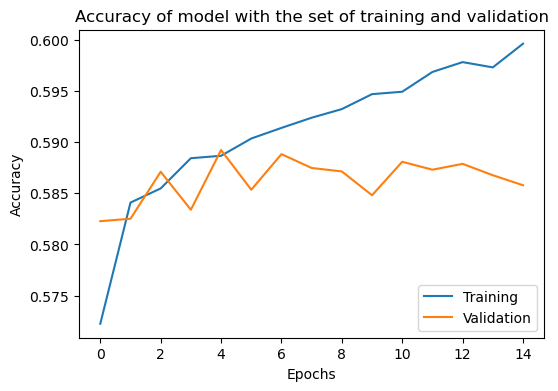

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(6,4))
plt.plot(history.history["accuracy"]);
plt.plot(history.history["val_accuracy"])
plt.title("Accuracy of model with the set of training and validation")
plt.xlabel("Epochs");
plt.ylabel("Accuracy");
plt.legend(["Training","Validation"],loc="lower right");

In [65]:
#Proving the results

for i in range(0,20):
    print("Real = {} , Prediction = {} ".format(y_test.values[i][0] , round(y_pred.values[i][0])) )

Real = 0 , Prediction = 0 
Real = 0 , Prediction = 2 
Real = 1 , Prediction = 1 
Real = 0 , Prediction = 2 
Real = 0 , Prediction = 2 
Real = 1 , Prediction = 2 
Real = 2 , Prediction = 1 
Real = 0 , Prediction = 1 
Real = 1 , Prediction = 0 
Real = 1 , Prediction = 2 
Real = 2 , Prediction = 2 
Real = 0 , Prediction = 0 
Real = 1 , Prediction = 1 
Real = 0 , Prediction = 0 
Real = 0 , Prediction = 0 
Real = 1 , Prediction = 1 
Real = 2 , Prediction = 2 
Real = 2 , Prediction = 2 
Real = 1 , Prediction = 2 
Real = 1 , Prediction = 0 


In [66]:
#ANOTHER WAY TO CREATE THE MODEL

In [9]:
#Importing the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [10]:
early=EarlyStopping(monitor="val_accuracy", patience=10)

In [11]:
y_train_alter=pd.DataFrame(to_categorical(y_train))
y_train_alter.head()

,0,1,2
0,0.000,1.000,0.000
1,1.000,0.000,0.000
2,0.000,0.000,1.000
3,1.000,0.000,0.000
4,1.000,0.000,0.000


In [12]:
y_test_alter=pd.DataFrame(to_categorical(y_test))
y_test_alter.head()

,0,1,2
0,1.000,0.000,0.000
1,1.000,0.000,0.000
2,0.000,1.000,0.000
3,1.000,0.000,0.000
4,1.000,0.000,0.000


In [70]:
#Creating the model
model2=Sequential()
model2.add(Dense(256,activation="relu",input_dim=len(X_train.columns)))
model2.add(Dense(32,activation="relu"))
model2.add(Dense(3,activation="softmax"))
model2.compile(optimizer="adam",metrics="accuracy",loss="categorical_crossentropy")
history2=model2.fit(X_train,y_train_alter,epochs=100,batch_size=32,validation_split=0.2,callbacks=[early])

Epoch 1/100
3706/3706 [==============================] - 14s 3ms/step - loss: 0.8573 - accuracy: 0.5737 - val_loss: 0.8427 - val_accuracy: 0.5810
Epoch 2/100
3706/3706 [==============================] - 12s 3ms/step - loss: 0.8374 - accuracy: 0.5845 - val_loss: 0.8372 - val_accuracy: 0.5839
Epoch 3/100
3706/3706 [==============================] - 12s 3ms/step - loss: 0.8337 - accuracy: 0.5854 - val_loss: 0.8416 - val_accuracy: 0.5815
Epoch 4/100
3706/3706 [==============================] - 13s 3ms/step - loss: 0.8307 - accuracy: 0.5880 - val_loss: 0.8367 - val_accuracy: 0.5840
Epoch 5/100
3706/3706 [==============================] - 15s 4ms/step - loss: 0.8284 - accuracy: 0.5896 - val_loss: 0.8342 - val_accuracy: 0.5864
Epoch 6/100
3706/3706 [==============================] - 12s 3ms/step - loss: 0.8266 - accuracy: 0.5895 - val_loss: 0.8329 - val_accuracy: 0.5862
Epoch 7/100
3706/3706 [==============================] - 12s 3ms/step - loss: 0.8248 - accuracy: 0.5911 - val_loss: 0.8355 -

In [71]:
#Evaluating the model

model2.evaluate(X_test,y_test_alter,verbose=0)

[0.8445377945899963, 0.5779100060462952]

In [72]:
#Evaluating the model using cohen_kappa and classification_report

from sklearn.metrics import cohen_kappa_score,classification_report

y_pred=pd.DataFrame(np.argmax(model2.predict(X_test,verbose=0),axis=1))

y_test_alter2=pd.DataFrame(np.argmax((y_test_alter.values),axis=1))

kappa=cohen_kappa_score(y_test_alter2,y_pred)

clas_rep=classification_report(y_test_alter2,y_pred)

print("Cohen Kappa : %f  " % (kappa))
print("="*80)
print("Classification Report:")
print(clas_rep)

Cohen Kappa : 0.366865  
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.60      0.66     21174
           1       0.49      0.52      0.51     21174
           2       0.55      0.61      0.58     21174

    accuracy                           0.58     63522
   macro avg       0.59      0.58      0.58     63522
weighted avg       0.59      0.58      0.58     63522



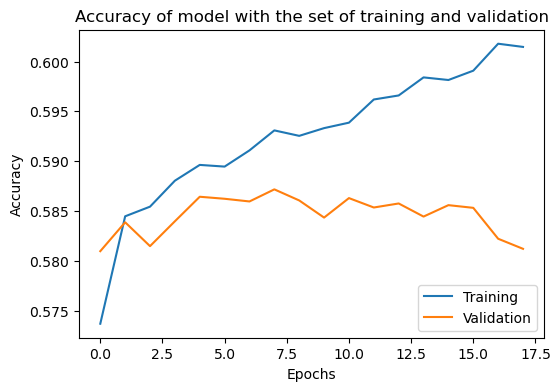

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(6,4))
plt.plot(history2.history["accuracy"]);
plt.plot(history2.history["val_accuracy"])
plt.title("Accuracy of model with the set of training and validation")
plt.xlabel("Epochs");
plt.ylabel("Accuracy");
plt.legend(["Training","Validation"],loc="lower right");

In [74]:
#Proving the results

for i in range(0,20):
    print("Real = {} , Prediction = {} ".format(y_test_alter2.values[i][0] , round(y_pred.values[i][0])) )

Real = 0 , Prediction = 0 
Real = 0 , Prediction = 2 
Real = 1 , Prediction = 1 
Real = 0 , Prediction = 2 
Real = 0 , Prediction = 2 
Real = 1 , Prediction = 2 
Real = 2 , Prediction = 1 
Real = 0 , Prediction = 1 
Real = 1 , Prediction = 0 
Real = 1 , Prediction = 2 
Real = 2 , Prediction = 2 
Real = 0 , Prediction = 0 
Real = 1 , Prediction = 2 
Real = 0 , Prediction = 0 
Real = 0 , Prediction = 0 
Real = 1 , Prediction = 1 
Real = 2 , Prediction = 2 
Real = 2 , Prediction = 2 
Real = 1 , Prediction = 2 
Real = 1 , Prediction = 0 


In [75]:
#Saving the model
model2.save("model_multiclasification_keras_softmax.h5")

In [23]:
##Using CV Score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

def model_function():
    model=Sequential()
    model.add(Dense(256,activation="relu",input_dim=X_train.shape[1]))
    model.add(Dense(32,activation="relu"))
    model.add(Dense(3,activation="softmax"))
    model.compile(optimizer="adam",metrics="accuracy",loss="categorical_crossentropy")
    return model

modelo=KerasClassifier(build_fn=model_function,epochs=20,batch_size=32,verbose=0)


cv=cross_val_score(modelo,X_train,y_train_alter,cv=5)

print("Mean_test_accuracy",cv.mean())

Mean_test_accuracy 0.5838359355926513


In [24]:
##Tuning hyperparameters

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score,RandomizedSearchCV
warnings.filterwarnings("ignore", category=DeprecationWarning)

def model_function(optimizer="adam",activation="relu"):
    model=Sequential()
    model.add(Dense(256,activation="relu",input_dim=X_train.shape[1]))
    model.add(Dense(32,activation="relu"))
    model.add(Dense(3,activation="softmax"))
    model.compile(optimizer="adam",metrics="accuracy",loss="categorical_crossentropy")
    return model

modelo=KerasClassifier(build_fn=model_function,epochs=3,batch_size=16,verbose=0)

parameters={
    "optimizer":["adam","sgd","rmsprop"],
    "activation":["relu","sigmoid"],
    "epochs":[10,20,40],
    "batch_size":[16,32,64]
}

random=RandomizedSearchCV(modelo, param_distributions=parameters,cv=3 , n_iter=15)

results=random.fit(X_train,y_train_alter)

print("Best Score", results.best_score_)
print("="*30)
print("Best Parameters" , results.best_params_)

Best Score 0.585111121336619
Best Parameters {'optimizer': 'sgd', 'epochs': 10, 'batch_size': 16, 'activation': 'sigmoid'}


In [13]:
##Tuning layers and neurons

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score,RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

def model_function_2(dense_layers_extra=2,nn=100):
    model=Sequential()
    model.add(Dense(units=nn,activation="sigmoid",input_dim=X_train.shape[1]))
    
    for i in range(1,dense_layers_extra+1):
        model.add(Dense(units=nn, activation="sigmoid"))
        
    model.add(Dense(3,activation="softmax"))
    
    model.compile(optimizer="sgd",loss="categorical_crossentropy",metrics="accuracy")
    
    return model

modelo=KerasClassifier(build_fn=model_function_2,epochs=3,batch_size=16,verbose=0)

parameters={
    "dense_layers_extra":[1,2,3,4],
    
    "nn":[32,64,128,256]
}

random=RandomizedSearchCV(modelo,param_distributions=parameters,cv=3)

results=random.fit(X_train,y_train_alter)

print("Best Score", results.best_score_)
print("="*30)
print("Best Parameters" , results.best_params_)

Best Score 0.5749099453290304
Best Parameters {'nn': 64, 'dense_layers_extra': 1}


In [14]:
#Creating the model with the best parameters
model=Sequential()
model.add(Dense(256,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(32,activation="relu"))
model.add(Dense(3,activation="softmax"))
model.compile(optimizer="sgd",metrics="accuracy",loss="categorical_crossentropy")
history=model.fit(X_train,y_train_alter,epochs=10,batch_size=16,validation_split=0.2)

Epoch 1/10
7411/7411 [==============================] - 22s 3ms/step - loss: 0.8715 - accuracy: 0.5675 - val_loss: 0.8510 - val_accuracy: 0.5791
Epoch 2/10
7411/7411 [==============================] - 21s 3ms/step - loss: 0.8424 - accuracy: 0.5817 - val_loss: 0.8458 - val_accuracy: 0.5808
Epoch 3/10
7411/7411 [==============================] - 20s 3ms/step - loss: 0.8366 - accuracy: 0.5852 - val_loss: 0.8423 - val_accuracy: 0.5836
Epoch 4/10
7411/7411 [==============================] - 20s 3ms/step - loss: 0.8326 - accuracy: 0.5871 - val_loss: 0.8418 - val_accuracy: 0.5813
Epoch 5/10
7411/7411 [==============================] - 21s 3ms/step - loss: 0.8305 - accuracy: 0.5883 - val_loss: 0.8403 - val_accuracy: 0.5818
Epoch 6/10
7411/7411 [==============================] - 20s 3ms/step - loss: 0.8287 - accuracy: 0.5894 - val_loss: 0.8416 - val_accuracy: 0.5797
Epoch 7/10
7411/7411 [==============================] - 22s 3ms/step - loss: 0.8268 - accuracy: 0.5915 - val_loss: 0.8394 - val_ac

In [16]:
#Evaluating the best model
model.evaluate(X_test,y_test_alter,verbose=0)

[0.8424614667892456, 0.57860267162323]

In [22]:
#Evaluating the model using classification_report

from sklearn.metrics import classification_report

y_pred=model.predict(X_test,verbose=0).round()

clas_rep=classification_report(y_test_alter,y_pred,zero_division=True)

print("Classification Report:")

print(clas_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.52      0.63     21174
           1       0.50      0.47      0.48     21174
           2       0.64      0.35      0.46     21174

   micro avg       0.63      0.45      0.52     63522
   macro avg       0.65      0.45      0.52     63522
weighted avg       0.65      0.45      0.52     63522
 samples avg       0.74      0.45      0.45     63522

